In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path="D:\Datasets\IRIS (1).csv"
df1=pd.read_csv(path)
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df1["species"] = df1["species"].astype('category')
df1.dtypes
df1["species"] = df1["species"].cat.codes
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#data.dropna(inplace=True)
#data.shape


In [8]:
selected_columns=['sepal_length','sepal_width','petal_length','petal_width','species']
df1=data[selected_columns]

In [10]:
X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,-1].values


In [19]:
import neurolab as nl

error = [] 
net = nl.net.newff([[1,7],[0,3],[10,190],[72,113]],[30,1],transf=[nl.trans.LogSig()] * 2)
net.trainf = nl.train.train_rprop

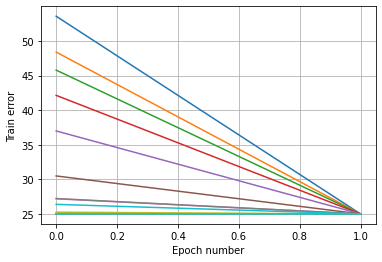

In [21]:

error.append(net.train(df1[["sepal_length"]+["sepal_width"]+["petal_length"]+["petal_width"]], df1[["species"]], show=0, epochs = 20,goal=0.001))
error
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error')
plt.grid()
plt.show()



In [25]:
predicted_values = net.sim(df1[["sepal_width"]+["sepal_length"]+["petal_length"]+["petal_width"]])

In [27]:
predicted_class=predicted_values
predicted_class[predicted_values>0.5]=1
predicted_class[predicted_values<=0.5]=0

predicted_class

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [29]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(df1[['species']],predicted_class)
print('Confusion Matrix : ', ConfusionMatrix)


accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print('Accuracy : ', accuracy)

error=1-accuracy
print('Error : ', error)

Confusion Matrix :  [[ 0 50  0]
 [ 0 50  0]
 [ 0 50  0]]
Accuracy :  0.3333333333333333
Error :  0.6666666666666667
